In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score
import seaborn as sns

In [222]:
df=pd.read_csv('creditcard.csv')
x_train = df.drop(columns='Class', axis=1).values
y_train = df['Class'].values

(array([1.5240e+03, 5.0190e+04, 1.8203e+05, 4.3107e+04, 7.5010e+03,
        3.1900e+02, 8.3000e+01, 4.5000e+01, 4.0000e+00, 4.0000e+00]),
 array([-5.6831712 , -3.42731967, -1.17146815,  1.08438337,  3.34023489,
         5.59608642,  7.85193794, 10.10778946, 12.36364099, 14.61949251,
        16.87534403]),
 <BarContainer object of 10 artists>)

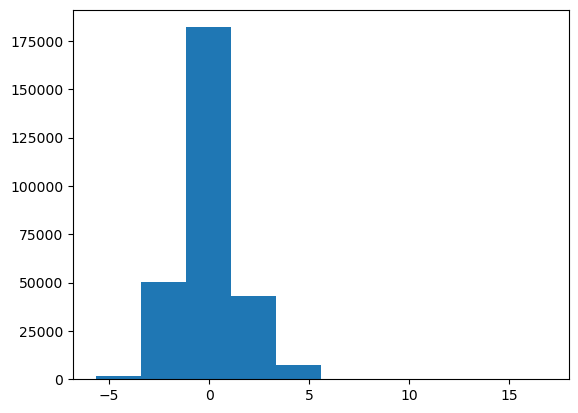

In [223]:
plt.hist(x_train[:,4])

In [224]:
correlation = df.corr()
# constructing a heatmap to understand the correlation between the columns
# plt.figure(figsize=(4,4))
# sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')
print(correlation['Class'])

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64


In [225]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=1)

In [226]:
def multivariate_gaussian(X, mu, sigma2):
    # Number of features (n)
    n = len(mu)
    # Ensure sigma2 is in the right shape
    sigma2 = sigma2.reshape(1, n)
    # Standard deviation (sigma)
    sigma = np.sqrt(sigma2)
    # Compute the normalization term (same for all rows)
    norm_factor = 1 / np.sqrt(2 * np.pi * sigma2)
    # Compute the exponent for each feature
    exponent = np.exp(- (X - mu)**2 / (2 * sigma2))
    # Combine normalization factor and exponent for each feature
    p_feature = norm_factor * exponent
    # Compute the product of the probabilities across all features for each example
    p = np.prod(p_feature, axis=1)
    return p

In [227]:
def estimate_gaussion(x):
    m=x.shape[0]
    mu=np.zeros(x.shape[1])
    vari=np.zeros(x.shape[1])
    mu=np.sum(x,axis=0)
    vari=np.sum((x-mu)**2,axis=0)
    mu/=m
    vari/=m
    return mu,vari

In [228]:
def select_threshold(y_cv,p_val):
    best_epsilon=0
    best_f1=0
    f1=0
    step_size = (max(p_val)-min(p_val))/1000
    for epsilon in np.arange(min(p_val),max(p_val),step_size):
        pred=(p_val<epsilon)
        f1=f1_score(y_cv,pred)
        if f1>best_f1:
            best_f1=f1
            best_epsilon=epsilon
    return best_epsilon,best_f1

In [229]:
# Estimate the Gaussian parameters
mu, var = estimate_gaussion(x_train)
p_train=multivariate_gaussian(x_train,mu,var)
p_cv=multivariate_gaussian(x_test,mu,var)
#finding the optimal epsilon and f1
epsilon,f1=select_threshold(y_test,p_cv)
p_train_=(p_train<epsilon)
p_cv_=(p_cv<epsilon)
accuracy=accuracy_score(y_test,p_cv_)
print(f"accuracy:{accuracy*100}")
print('Best epsilon found using cross-validation: %e'% epsilon)
print('Best F1 on Cross Validation Set:  %f'% f1)
print('# Anomalies found: %d'% sum(p_train < epsilon))

accuracy:99.6804887468839
Best epsilon found using cross-validation: 3.894823e-92
Best F1 on Cross Validation Set:  0.149533
# Anomalies found: 519
